## Linear Regression

### Part 1 - Data Preprocessing

### Importing the dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
#variable and this is a function for uploading the dataset
dataset = pd.read_csv('housing.csv') 

In [60]:
dataset.head() #display 5 rows of dataset

#10,000 rows
#data points collected from a combined cycle power plant over six years
#5 columns: AT ambient temp,V exhaust vacuum, AP ambient pressure, RH relative humdity, PE net hourly  electrical energy output
# independent variables: AT, V, AP and RH
# dependent variable: PE

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [61]:
# [rows,columns]
X= dataset.iloc[:,:-2].values
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  3.2200e+02,
         1.2600e+02,  8.3252e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  2.4010e+03,
         1.1380e+03,  8.3014e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  4.9600e+02,
         1.7700e+02,  7.2574e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.0070e+03,
         4.3300e+02,  1.7000e+00],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  7.4100e+02,
         3.4900e+02,  1.8672e+00],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  1.3870e+03,
         5.3000e+02,  2.3886e+00]])

In [62]:
y = dataset.iloc[:,-2].values
y

array([452600, 358500, 352100, ...,  92300,  84700,  89400])

### Creating the Training Set and the Test Set

In [63]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=1)

In [64]:
X_train

array([[-1.2225e+02,  3.7860e+01,  4.8000e+01, ...,  1.6560e+03,
         4.5900e+02,  3.0417e+00],
       [-1.1973e+02,  3.6760e+01,  3.0000e+01, ...,  8.8600e+02,
         3.1100e+02,  3.1000e+00],
       [-1.2219e+02,  3.8130e+01,  5.0000e+00, ...,  4.3610e+03,
         1.3950e+03,  4.9504e+00],
       ...,
       [-1.1845e+02,  3.4080e+01,  5.2000e+01, ...,  3.8400e+02,
         1.4500e+02,  7.1576e+00],
       [-1.1697e+02,  3.3940e+01,  2.9000e+01, ...,  1.7220e+03,
         6.0300e+02,  3.0432e+00],
       [-1.2220e+02,  3.7790e+01,  3.5000e+01, ...,  1.0090e+03,
         3.9000e+02,  2.3036e+00]])

In [65]:
X_test

array([[-118.18  ,   34.14  ,   38.    , ..., 1131.    ,  465.    ,
           7.7116],
       [-118.19  ,   34.14  ,   38.    , ...,  793.    ,  297.    ,
           5.2962],
       [-117.25  ,   33.2   ,   10.    , ..., 1302.    ,  471.    ,
           2.7961],
       ...,
       [-123.71  ,   39.88  ,   42.    , ...,  656.    ,  303.    ,
           1.4952],
       [-122.18  ,   37.44  ,   44.    , ...,  948.    ,  346.    ,
           8.2436],
       [-118.58  ,   34.2   ,   35.    , ...,  793.    ,  249.    ,
           5.1463]])

In [66]:
y_train

array([489600,  71300, 214800, ..., 500001,  91200, 126000])

In [67]:
y_test

array([360900, 291500, 131300, ...,  69800, 500001, 220200])

## Part 2 - Building and training the model

### Building the model


In [68]:
# linear_model is the module
# `LinearRegression is a class` is defining that `LinearRegression` is a class within the `linear_model` module. It indicates that `LinearRegression` is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Training the Model


In [69]:
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train, y_train)


LinearRegression()

### Inference


In [70]:
y_pred = model.predict(X_test)
y_pred

array([377391.41409713, 274015.85270736, 147032.98093887, ...,
       134782.92330106, 428717.35100963, 274864.76957777])

### Making the prediction of a single data point with Longitude = -122.23, Latitude = 37.84, Housing Median Age = 50, Total rooms = 2515, Total Bedrooms = 399 , Populations = 970, Households = 373, Median Income = 5.8596

In [71]:
model.predict([[-122.23,37.84,50,2515,399,970,373,5.8596]])


array([328762.40863455])

## Part 3: Evaluating the Model

### R-Squared

In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6453289503252118

### Adjusted R-Squared

In [73]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.6446331758285471

# Part 4 Gui

In this part we integrate GUI to effecctively and efficiently evaluate the

In [74]:
import tkinter as tk

# Create the main window
root = tk.Tk()
root.title("Checkbox Example")
root.attributes('-fullscreen', True)  # Set the window to full screen
root.configure(bg="#e6f7ff")  # Light blue background

# Function to create text boxes for selected checkboxes
def continue_action():
    # Clear previous text boxes
    for widget in text_frame.winfo_children():
        widget.destroy()
    
    selected_options.clear()  # Clear previous selections
    for i, var in enumerate(checkbox_vars):
        if var.get() == 1:
            selected_options.append(checkbox_labels[i])
    
    # Create text boxes for selected options
    for option in selected_options:
        label = tk.Label(text_frame, text=f"Enter value for {option}:", bg="#e6f7ff", font=("Arial", 10))
        label.pack(anchor='w', padx=10, pady=2)  # Reduced padding for a compact layout
        entry = tk.Entry(text_frame, width=30)
        entry.pack(anchor='w', padx=10, pady=2)  # Reduced padding for a compact layout

# Function to minimize the window
def minimize_window():
    root.iconify()

# Function to exit the application
def exit_app():
    root.destroy()

# Create a frame for the title bar with buttons
title_frame = tk.Frame(root, bg="#e6f7ff")
title_frame.pack(side=tk.TOP, fill=tk.X)

# Create minimize and exit buttons
minimize_button = tk.Button(title_frame, text="_", command=minimize_window, bg="#ff9966", fg="white", font=("Arial", 12), relief='flat')
minimize_button.pack(side=tk.RIGHT, padx=5)

exit_button = tk.Button(title_frame, text="X", command=exit_app, bg="#ff6666", fg="white", font=("Arial", 12), relief='flat')
exit_button.pack(side=tk.RIGHT)

# Create a frame for checkboxes
frame = tk.Frame(root, bg="#e6f7ff", padx=20, pady=10)  # Adjusted padding
frame.pack(side=tk.LEFT, padx=20)  # Padded to the left of the screen

# Create a frame for text boxes
text_frame = tk.Frame(root, bg="#e6f7ff")
text_frame.pack(side=tk.LEFT, padx=20)  # Padded to the left of the screen

# List to store the checkbox variables
checkbox_vars = []
# Labels for the checkboxes
checkbox_labels = [
    "Longitude", 
    "Latitude", 
    "Housing Median Age", 
    "Total Rooms", 
    "Total Bedrooms", 
    "Population", 
    "Households",
    "Median Income"
]

# List to store selected options
selected_options = []

# Create checkboxes with the given labels
for i, label in enumerate(checkbox_labels):
    var = tk.IntVar()
    # Alternate background colors for each checkbox
    bg_color = "#cceeff" if i % 2 == 0 else "#b3e0ff"
    checkbox = tk.Checkbutton(frame, text=label, variable=var, bg=bg_color, font=("Arial", 10), anchor='w', selectcolor="#ffcccb")
    checkbox.pack(anchor='w', padx=10, pady=2)  # Reduced padding for a compact layout
    checkbox_vars.append(var)

# Create a continue button
continue_button = tk.Button(root, text="Continue", command=continue_action, bg="#66b3ff", fg="white", font=("Arial", 12), relief='raised')
continue_button.pack(side=tk.LEFT, padx=20, pady=10)  # Padded to the left of the screen

# Add a decorative label at the top and anchor it to the left
title_label = tk.Label(root, text="Linear Regression: California Housing Prices", bg="#e6f7ff", font=("Arial", 14, "bold"))
title_label.pack(anchor='w', padx=20, pady=10)  # Fixed to the left of the screen

# Start the Tkinter event loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable

# Summary

## Variable Importance Based on Individual R2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('housing.csv') 
dataset.head()  # Display 5 rows of dataset

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Predict for a specific input
model.predict([[-122.23, 37.84, 50, 2515, 399, 970, 373, 5.8596]])

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R²
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("R² Score:", r2)
print("Adjusted R² Score:", adj_r2)
print("Mean Squared Error:", mse)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, color='blue', label='Actual Values', alpha=0.5)  # Actual values in blue
plt.scatter(y_pred, color='green', label='Predicted Values', alpha=0.5)  # Predicted values in green
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot the residuals (errors)
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.bar(range(len(errors)), errors, color='orange', label='Errors', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Errors between Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.grid()
plt.show()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


ValueError: All arrays must be of the same length

Linear Regression Model Graph
x= X_TRAIN
y= Y_Test

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Sample Prediction: [328762.40863455]
R^2 Score: 0.6453289503252118
Adjusted

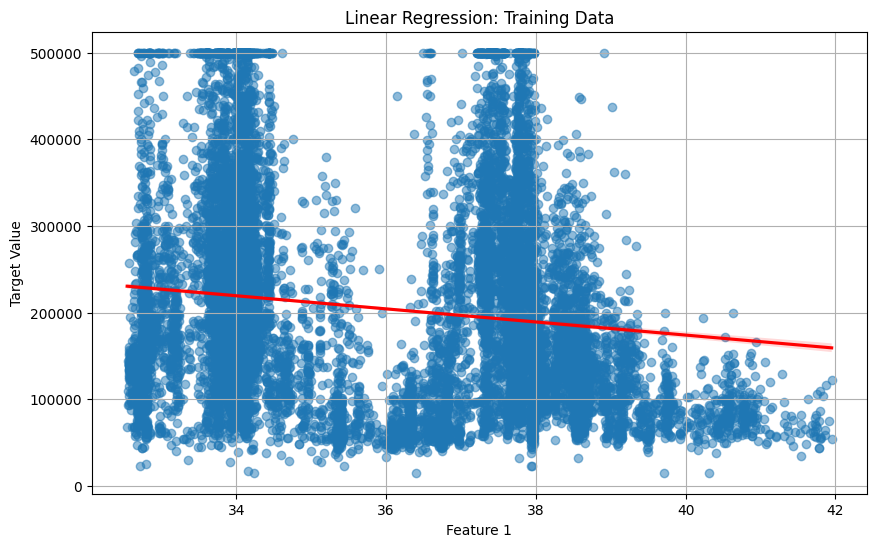

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variable and this is a function for uploading the dataset
dataset = pd.read_csv('housing.csv') 

# Display 5 rows of dataset
print(dataset.head())

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DataFrame for the training data
train_data = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
train_data['Target'] = y_train

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict a new sample
sample_prediction = model.predict([[-122.23, 37.84, 50, 2515, 399, 970, 373, 5.8596]])
print("Sample Prediction:", sample_prediction)

# Calculate R^2 and adjusted R^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score:", adj_r2)

# Plotting the linear regression
feature_index = 7  # Change this index to visualize other features
X_feature_train = X_train[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_train, y=y_train, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel(f'Feature {feature_index}')  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()

# Set y-axis limit
plt.ylim(0, 500000)  # Set y-axis limit from 0 to 500,000

plt.show()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
R-squared: 0.6453289503252118
Adjusted R-squared: 0.6446331758285471


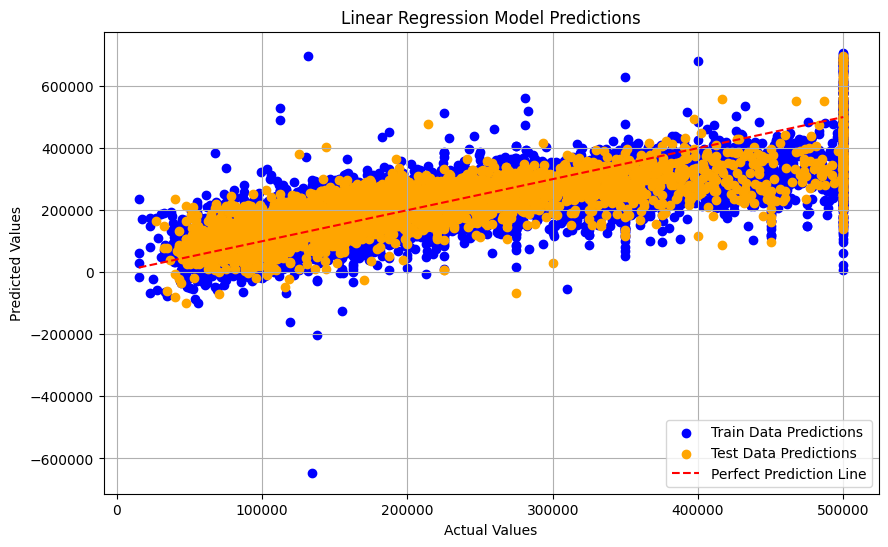

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
dataset = pd.read_csv('housing.csv') 

# Display the first 5 rows of the dataset
print(dataset.head()) 

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print R-squared and adjusted R-squared
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

# Create a scatter plot for training data and regression line
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(y_train, model.predict(X_train), color='blue', label='Train Data Predictions')

# Plot testing data
plt.scatter(y_test, y_pred, color='orange', label='Test Data Predictions')

# Plotting the regression line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the graph
plt.title('Linear Regression Model Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.85                  52         1274             235   
4    -122.25     37.85                  52         1627             280   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Sample Prediction: [328762.40863455]
R^2 Score: 0.6453289503252118
Adjusted

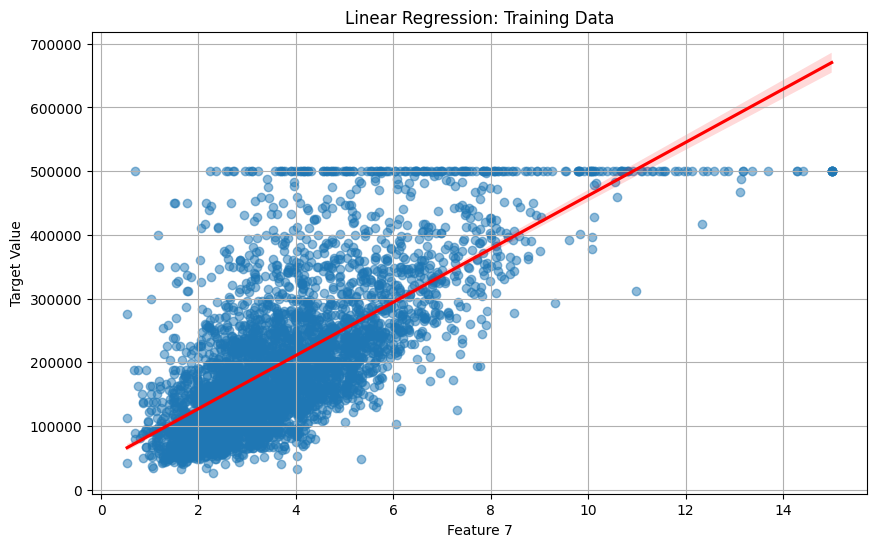

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variable and this is a function for uploading the dataset
dataset = pd.read_csv('housing.csv') 

# Display 5 rows of dataset
print(dataset.head())

# [rows, columns]
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a DataFrame for the training data
train_data = pd.DataFrame(X_train, columns=[f'Feature_{i}' for i in range(X_train.shape[1])])
train_data['Target'] = y_train

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Predict a new sample
sample_prediction = model.predict([[-122.23, 37.84, 50, 2515, 399, 970, 373, 5.8596]])
print("Sample Prediction:", sample_prediction)

# Calculate R^2 and adjusted R^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score:", adj_r2)

# Plotting the linear regression
feature_index = 7  # Change this index to visualize other features
X_feature_test = X_test[:, feature_index]

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x=X_feature_test, y=y_test, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel(f'Feature {feature_index}')  # Label for the chosen feature
plt.ylabel('Target Value')  # Label for the target variable
plt.title('Linear Regression: Training Data')  # Title for the plot
plt.grid()
plt.show()